<a href="https://colab.research.google.com/github/Ishan0704/Suspicious-Transaction-Detection/blob/main/Kaggle_Malware_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Malware dataset.csv')
df

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,995,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99996,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,996,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99997,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,997,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99998,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,998,malware,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split


In [4]:
# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())


                                                hash  millisecond  \
0  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            0   
1  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            1   
2  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            2   
3  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            3   
4  42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            4   

  classification  state  usage_counter        prio  static_prio  normal_prio  \
0        malware      0              0  3069378560        14274            0   
1        malware      0              0  3069378560        14274            0   
2        malware      0              0  3069378560        14274            0   
3        malware      0              0  3069378560        14274            0   
4        malware      0              0  3069378560        14274            0   

   policy  vm_pgoff  ...  nivcsw  min_flt  maj_flt  fs_excl_counter  \
0       0         0  ...       0 

In [5]:
scaler = MinMaxScaler()

# Select the features and target
# Example: Assuming 'task_size' as the target and the rest as features
features = ['millisecond', 'total_vm']
target = 'task_size'

# Normalize features and target
scaled_features = scaler.fit_transform(df[features])
scaled_target = scaler.fit_transform(df[[target]])

# Combine back into a scaled dataframe (optional for tracking)
scaled_df = pd.DataFrame(scaled_features, columns=features)
scaled_df[target] = scaled_target


In [23]:
# Display the normalized features
print("Normalized Features:")
print(scaled_df[features])

# Display the normalized target
print("\nNormalized Target:")
print(scaled_df[target])


Normalized Features:
       millisecond  total_vm
0         0.000000  0.052031
1         0.001001  0.052031
2         0.002002  0.052031
3         0.003003  0.052031
4         0.004004  0.052031
...            ...       ...
99995     0.995996  0.012830
99996     0.996997  0.012830
99997     0.997998  0.012830
99998     0.998999  0.012830
99999     1.000000  0.012830

[100000 rows x 2 columns]

Normalized Target:
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: task_size, Length: 100000, dtype: float64


In [24]:
scaled_df

,millisecond,total_vm,task_size
0,0.000000,0.052031,0.0
1,0.001001,0.052031,0.0
2,0.002002,0.052031,0.0
3,0.003003,0.052031,0.0
4,0.004004,0.052031,0.0
...,...,...,...
99995,0.995996,0.012830,0.0
99996,0.996997,0.012830,0.0
99997,0.997998,0.012830,0.0
99998,0.998999,0.012830,0.0


In [25]:
df[['millisecond', 'total_vm', 'task_size']]

,millisecond,total_vm,task_size
0,0,150,0
1,1,150,0
2,2,150,0
3,3,150,0
4,4,150,0
...,...,...,...
99995,995,40,0
99996,996,40,0
99997,997,40,0
99998,998,40,0


In [36]:
# Sequence length (number of time steps in each input sample)
sequence_length = 10

# Create sequences
X = []
y = []
for i in range(len(scaled_features) - sequence_length):
    X.append(scaled_features[i:i+sequence_length])  # Sequence of features
    y.append(scaled_target[i+sequence_length])     # Target for the sequence

X = np.array(X)
y = np.array(y)

print(f"Shape of X: {X.shape}")  # Should be (num_samples, sequence_length, num_features)
print(f"Shape of y: {y.shape}")  # Should be (num_samples,)

Shape of X: (99990, 10, 2)
Shape of y: (99990, 1)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 79992, Testing samples: 19998


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Build the model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(sequence_length, len(features))))  # 50 units
model.add(Dense(1))  # Single output (regression task)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [10]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 6.0220e-04 - mae: 0.0073 - val_loss: 3.7241e-06 - val_mae: 0.0014
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.1540e-06 - mae: 8.5638e-04 - val_loss: 1.0114e-06 - val_mae: 2.3912e-04
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 3.3765e-06 - mae: 0.0010 - val_loss: 1.4933e-05 - val_mae: 0.0025
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.5716e-06 - mae: 7.9369e-04 - val_loss: 2.4612e-07 - val_mae: 3.1180e-04
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.5059e-06 - mae: 5.0022e-04 - val_loss: 4.7432e-07 - val_mae: 2.6643e-04
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 1.5125e-06 - mae: 5.9332e-04 - val_loss: 5.7102e-08 - val_mae: 1.5210e-04
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 3.5963e-07 - mae: 2.6124e-04 - val_loss: 1.0176e-08 - val_mae: 3.5272e-05
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 

In [11]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Mean Absolute Error: {mae}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6057e-09 - mae: 7.3663e-05
Test Loss: 9.540818801667683e-09
Test Mean Absolute Error: 7.451752026099712e-05


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


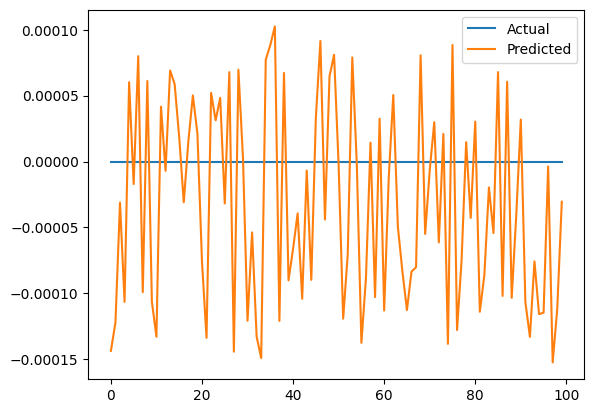

In [12]:
predictions = model.predict(X_test)

# Example: Plotting predictions vs actual values
import matplotlib.pyplot as plt

plt.plot(y_test[:100], label='Actual')
plt.plot(predictions[:100], label='Predicted')
plt.legend()
plt.show()


In [13]:
model.save('rnn_model.h5')


In [14]:
model.save('my_model.keras')

In [15]:
predictions = model.predict(X_test)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [17]:
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)

# R-Squared
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared (R²): {r2}")


Mean Squared Error (MSE): 9.540812049642042e-09
Root Mean Squared Error (RMSE): 9.767708047255529e-05
Mean Absolute Error (MAE): 7.451749231415962e-05
R-Squared (R²): 0.0


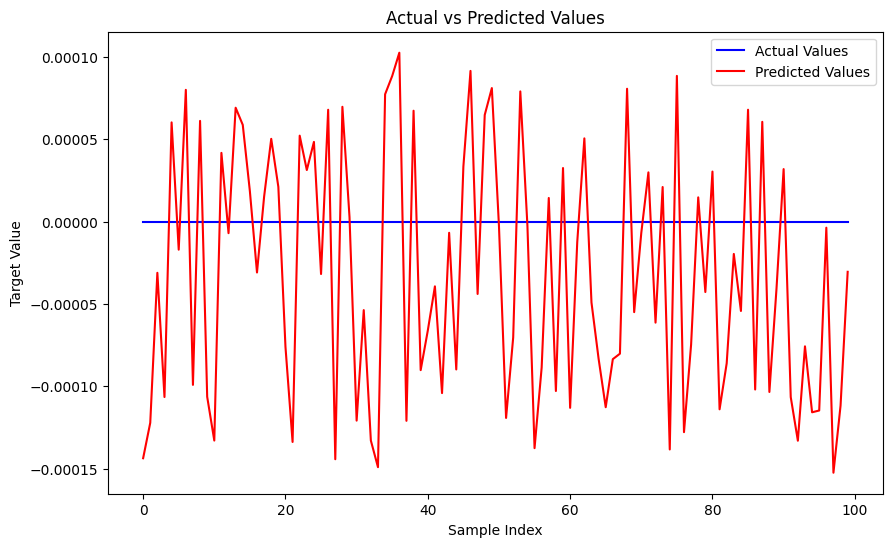

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Actual Values', color='blue')
plt.plot(predictions[:100], label='Predicted Values', color='red')
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.show()


In [22]:
print("Features (X):")


print("\nTarget (y):")


Features (X):

Target (y):
